In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime 
import warnings
from pylab import mpl
import pylab as pl
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"]#显示汉字
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline

In [3]:
import pyecharts
# from pyecharts import Bar

In [ ]:
class Genegraph():#Generate Zone graphs
    def __init__(self,data,zone):
        self.zone = zone
        self.data = data
        self.desribe=[]# save text on the name of each graph
    
    def barplot(self):
        pass

In [269]:
def load_data(hygiene):
        
        hygiene = hygiene.drop('Unnamed: 0',axis=1)
        hygiene['VOC'] = hygiene.VOC.convert_objects(convert_numeric=True)
        title_Dict = {}
        title_Dict.update(dict.fromkeys(['(0, 10]'], '(0, 10]℃'))
        title_Dict.update(dict.fromkeys(['(10, 20]'], '(10, 20]℃'))
        title_Dict.update(dict.fromkeys(['(20, 30]'], '(20, 30]℃'))
        hygiene['Temp_Level'] = hygiene['Temp_Level'].map(title_Dict)
        hygiene.Time_Tags[hygiene.Time_Tags=='Morning'] = '早'
        hygiene.Time_Tags[hygiene.Time_Tags=='Noon'] = '午'
        hygiene.Time_Tags[hygiene.Time_Tags=='Night'] = '晚'
        """--------------------------------------------"""
        hygiene.Info_source[hygiene.Info_source=='device'] = '设备'
        hygiene.Info_source[hygiene.Info_source=='public'] = '发布'
        return hygiene
    
def erroprocess(data):
    hygiene =data
    hygiene[hygiene['Zone']=='同安'][hygiene['PM2.5']>60].index
    hygiene[hygiene['Zone']=='湖里'][hygiene['PM2.5']>60].index
    hygiene[hygiene['Zone']=='思明'][hygiene['PM2.5']>110].index
    hygiene[hygiene['Zone']=='翔安'][hygiene['PM2.5']>60].index
    hygiene[hygiene['Zone']=='集美'][hygiene['PM2.5']>120].index
    hygiene = hygiene.drop(index=[363,1378, 4603, 4792, 4793,1926,1754, 1755, 1756, 1757,2675, 2676],axis=0)

    return hygiene


    
def landscape(data,save=0,dpi=400):
#         hygiene = load_data()
        hygiene = data
        plt.figure(figsize=(12,8))
        # sns.set_palette('ocean_r')
        ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_Tags',jitter=True,data=hygiene,palette='ocean_r')
        ax.set_xlabel('区域',fontsize=22)
        ax.set_ylabel('PM2.5 μg/m3',fontsize=22)
        ax.legend(fontsize=14)
        # plt.legend(('早','午','晚'),loc='best',fontsize=18)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.title('卫生：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
    
        if save==1:
            plt.savefig('未进行数据处理卫生：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=dpi,bbox_inches = 'tight')
        else:
            None
def data_split(data):
    hygiene = data
    hygiene_device = hygiene[hygiene['Info_source']=='设备']
    hygiene_public = hygiene[hygiene['Info_source']=='发布']

    jimei = hygiene[hygiene.Zone=="集美"]
    jimei_public = jimei[jimei['Info_source']=='发布']
    jimei_device = jimei[jimei['Info_source']=='设备']
    huli = hygiene[hygiene.Zone=="湖里"]
    huli_public = huli[huli['Info_source']=='发布']
    huli_device = huli[huli['Info_source']=='设备']
    siming = hygiene[hygiene.Zone=="思明"]
    siming_public = siming[siming['Info_source']=='发布']
    siming_device = siming[siming['Info_source']=='设备']
    tongan = hygiene[hygiene.Zone=="同安"]
    tongan_public = tongan[tongan['Info_source']=='发布']
    tongan_device = tongan[tongan['Info_source']=='设备']
    xiangan = hygiene[hygiene.Zone=="翔安"]
    xiangan_public = xiangan[xiangan['Info_source']=='发布']
    xiangan_device = xiangan[xiangan['Info_source']=='设备']
    return hygiene,hygiene_device,hygiene_public,jimei,jimei_public,jimei_device,huli,huli_public,huli_device,siming,siming_public,siming_device,tongan,tongan_public,tongan_device,xiangan,xiangan_public,xiangan_device



def zone_split(data):
    location_dict={'集美':'jimei','湖里':'huli','思明':'siming','同安':'tongan','翔安':'xiangan'}
    for cname,ename in location_dict.items():
        zone = ename
        zone = hygiene[hygiene['Zone']=='%s'%cname]
        zone_public = zone[zone['Info_source']=='发布']
        zone_device = zone[zone['Info_source']=='设备']
    #     print(type(zone))
    #     print(type(ename))
        plt.figure(figsize=(16,8))
        sns.set_palette('Set2')
        plt.subplot(121)
        zone_public['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
        plt.xlabel('%s医院：发布信息统计'%cname,fontsize=18)
        plt.ylabel('')
        plt.subplot(122)
        zone_device['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
        plt.xlabel('%s医院：监测信息统计'%cname,fontsize=18)
        plt.ylabel('')
    #     plt.savefig('集美：不同数据源PM2.5质量等级饼状图.jpg',dpi=400,bbox_inches = 'tight')


        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        # plt.grid(linestyle="--")
        # av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
        ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Info_source',data = zone,ci=None,palette="Set1")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        # ax.set_xlabel("Time_episode",fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("PM2.5 μg/m3",fontsize=20)
        plt.axhline(y=35,c='black',ls='-.',lw='2')
        # ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
        ax.legend({'PM2.5_35':'e','设备':'设备','发布':'发布'},fontsize=16,loc='best')
        plt.title('%s医院：不同数据源不同时间段下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s医院:不同数据源不同时间段下PM2.5平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')

        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        # plt.grid(linestyle="--")
        # av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
        ax = sns.barplot(x='Time_Tags', y='PM10',hue='Info_source',data = zone,ci=None,palette="coolwarm")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        # ax.set_xlabel("Time_episode",fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("PM10 μg/m3",fontsize=20)
        # plt.axhline(y=35,c='black',ls='-.',lw='2')
        # ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
        ax.legend(fontsize=16,loc='best')
        plt.title('%s医院：不同数据源不同时间段下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s医院:不同数据源不同时间段下PM10平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')

        temp_list = ['(0, 10]℃','(10, 20]℃', '(20, 30]℃' ]
        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Temp_Level',hue_order=temp_list,data = zone_device,order=['早','午','晚'],ci=None,palette="Set1")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("PM2.5 μg/m3",fontsize=20)
        plt.axhline(y=35,c='black',ls='-.',lw='2')
        plt.legend(fontsize=14,loc='best')
        plt.title('%s设备：不同时间段、温度区间下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('集美设备数据源：不同时间段、温度区间下PM2.5平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')


        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        ax = sns.barplot(x='Time_Tags', y='PM10',hue='Temp_Level',hue_order=temp_list,data = zone_device,order=['早','午','晚'],ci=None,palette="coolwarm")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("PM10 μg/m3",fontsize=20)
        plt.axhline(y=35,c='black',ls='-.',lw='2')
        plt.legend(fontsize=14,loc='best')
        plt.title('%s设备：不同时间段、温度区间下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s设备数据源：不同时间段、温度区间下PM10平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')

        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        ax = sns.barplot(x='Time_Tags', y='HCHO',hue='Temp_Level',hue_order=temp_list,data = zone_device,order=['早','午','晚'],ci=None,palette="Spectral")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("HCHO mg/m3",fontsize=20)
        # plt.axhline(y=35,c='black',ls='-.',lw='2')
        plt.legend(fontsize=14,loc='best')
        plt.title('%s设备：不同时间段、温度区间下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s设备数据源：不同时间段、温度区间下HCHO平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')

        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        ax = sns.barplot(x='Time_Tags', y='VOC',hue='Temp_Level',hue_order=temp_list,data = zone_device,order=['早','午','晚'],ci=None,palette="Spectral_r")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xlabel("时间区间",fontsize=20)
        ax.set_ylabel("VOC mg/m3",fontsize=20)
        # plt.axhline(y=35,c='black',ls='-.',lw='2')
        plt.legend(fontsize=14,loc='best')
        plt.title('%s设备：不同时间段、温度区间下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s设备数据源：不同时间段、温度区间下VOC平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')

        fig, axis1 = plt.subplots(1,1,figsize=(12,8))
        ax = sns.boxplot(x='Temp_Level', y='PM2.5',hue='Info_source',data = zone,order=['(0, 10]℃','(10, 20]℃', '(20, 30]℃'],palette="Set1")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xlabel("温度区间",fontsize=20)
        ax.set_ylabel("PM2.5 μg/m3",fontsize=20)
        # plt.axhline(y=35,c='black',ls='-.',lw='2')
        ax.legend(fontsize=14,loc='best')
        plt.title('%s:不同数据源、温度区间下PM2.5平均值对比'%cname,loc='center',fontsize=18)
    #     plt.savefig('%s：不同数据源、温度区间下PM2.5平均值对比.jpg'%cname,dpi=400,bbox_inches = 'tight')


def barplot(data_public,data_device,save=0,dpi=400):
    jimei_public = data_public
    jimei_device = data_device
    plt.figure(figsize=(16,8))
    sns.set_palette('Set1')
    plt.subplot(121)
    jimei_public['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
    plt.xlabel('集美医院：发布信息统计',fontsize=18)
    plt.ylabel('')
    plt.subplot(122)
    jimei_device['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
    plt.xlabel('集美医院：监测信息统计',fontsize=18)
    plt.ylabel('')
    
    if save==1:
        plt.savefig('集美：不同数据源PM2.5质量等级饼状图.jpg',dpi=400,bbox_inches = 'tight')
    else:
        None
    

def main():
    hygiene = pd.read_csv('data_hygiene.csv',low_memory=True)
    data1 = load_data(hygiene)
    landscape(data1)
    data = erroprocess(data1)
    landscape(data)    
    hygiene,hygiene_device,hygiene_public,jimei,jimei_public,jimei_device,huli,huli_public,huli_device,siming,siming_public,siming_device,tongan,tongan_public,tongan_device,xiangan,xiangan_public,xiangan_device = data_split(data)
#     barplot(jimei_public,jimei_device)
#     barplot(huli_public,huli_device)
    zone_split(data)

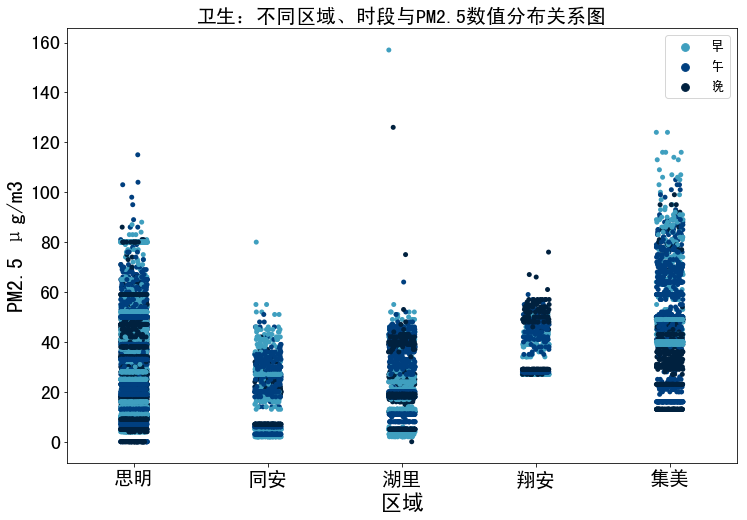

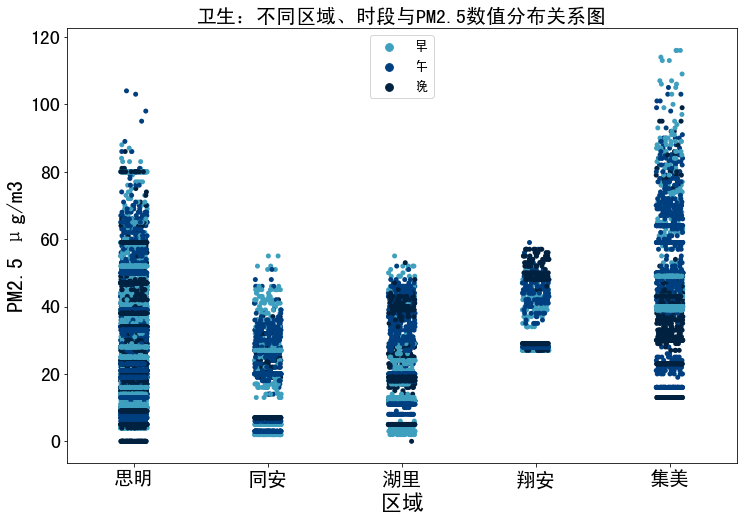

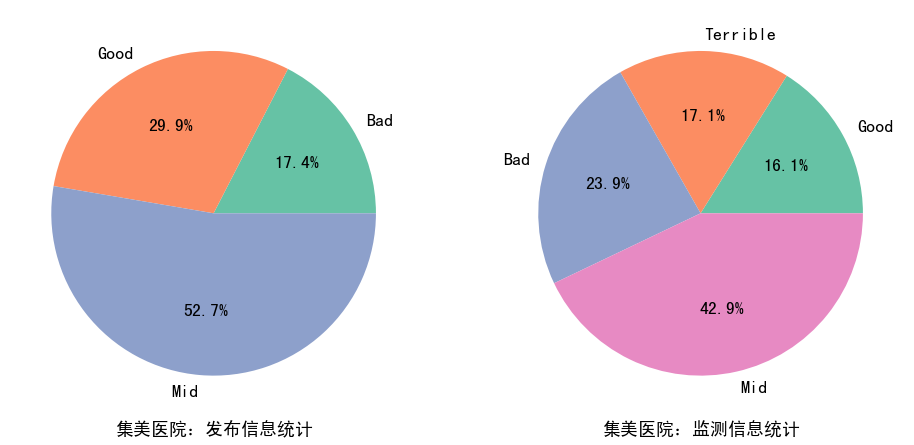

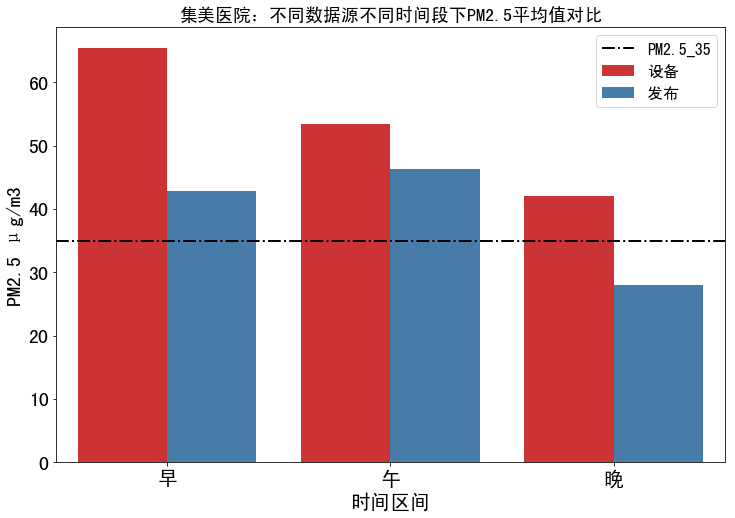

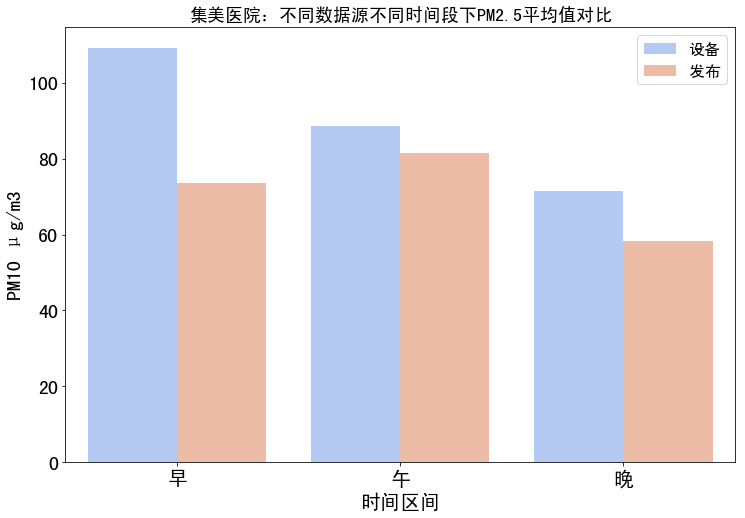

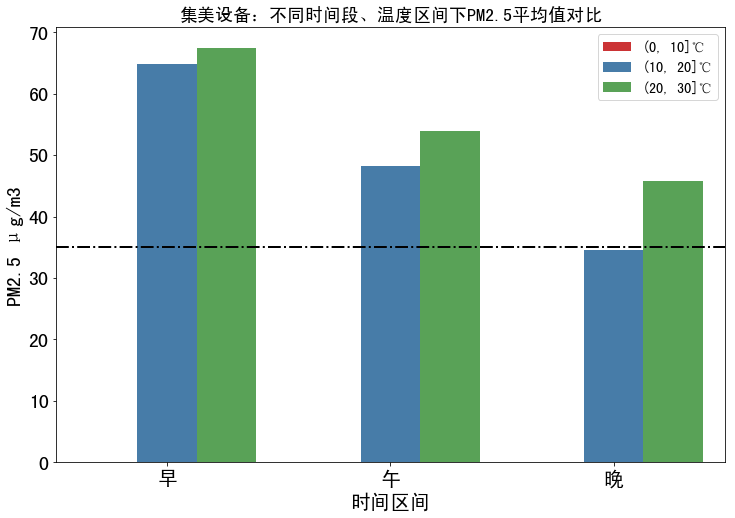

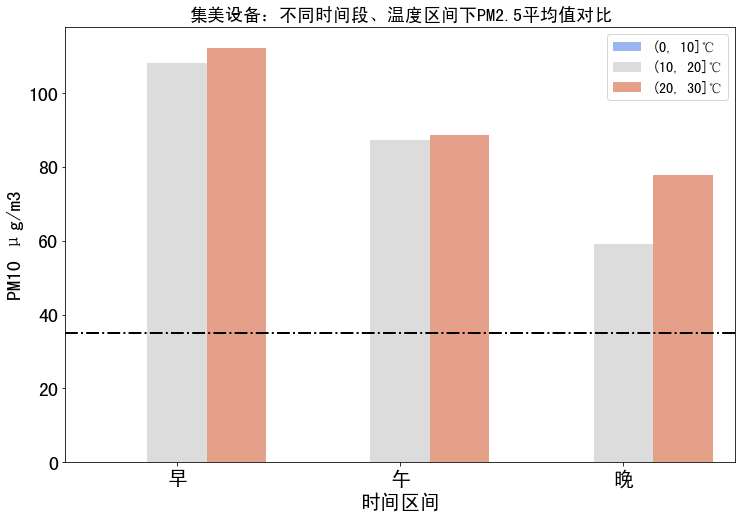

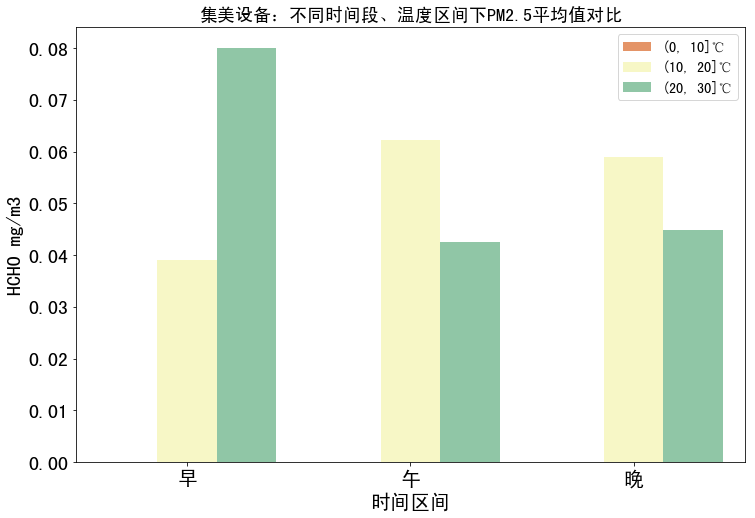

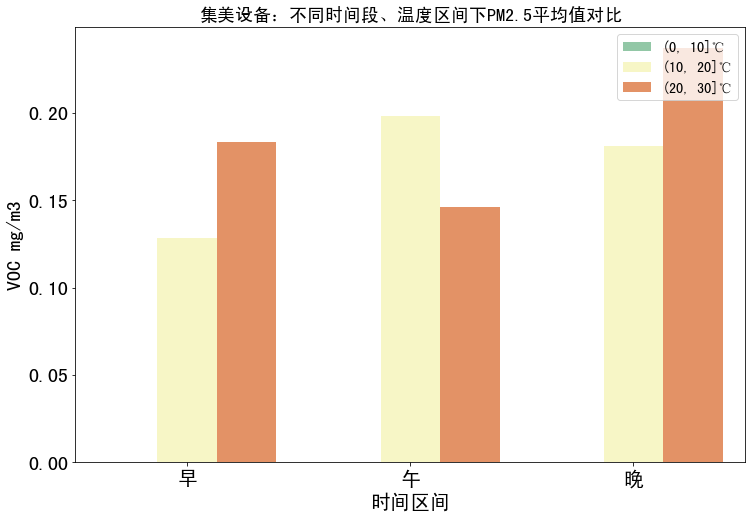

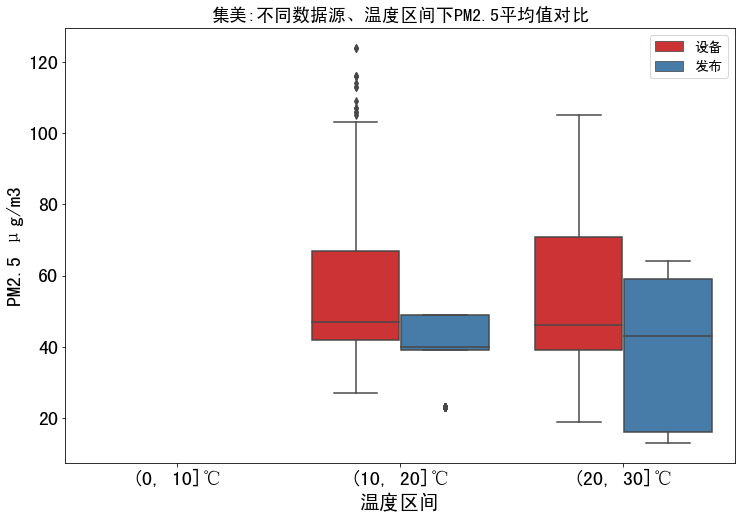

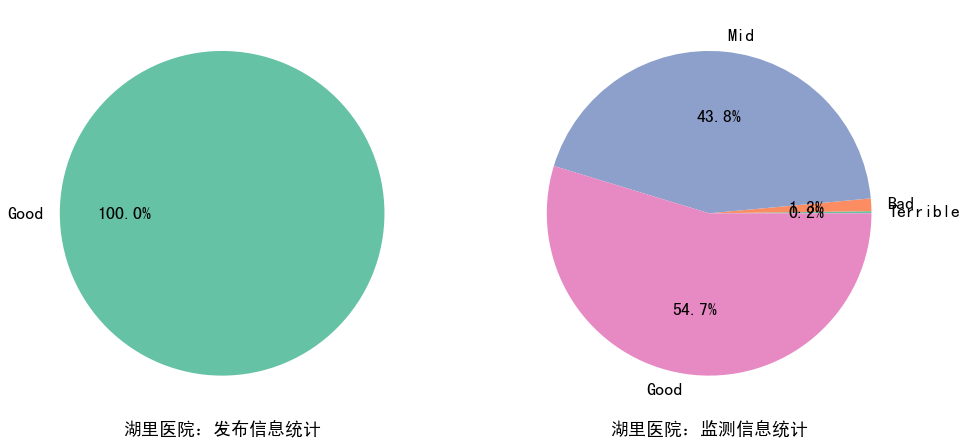

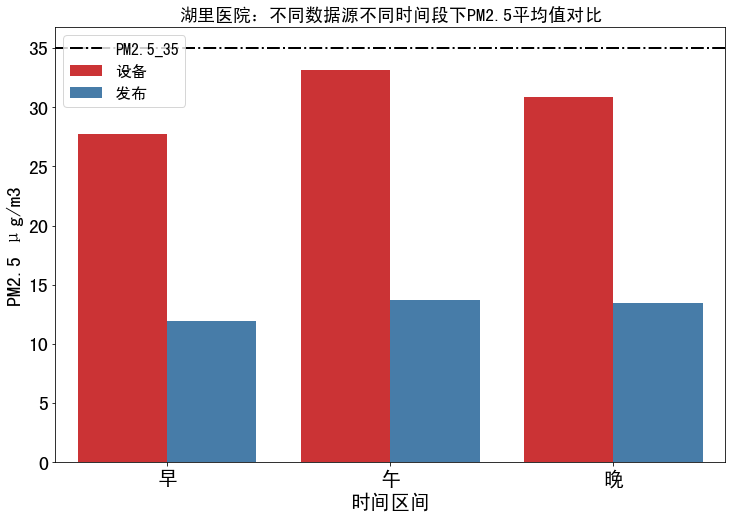

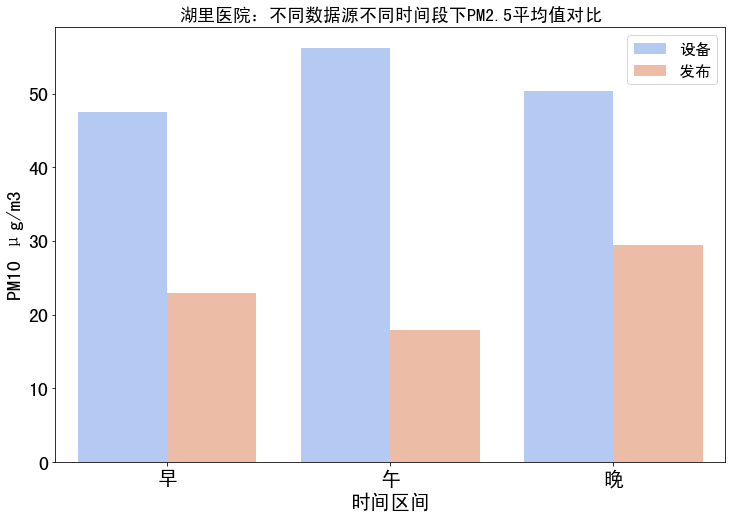

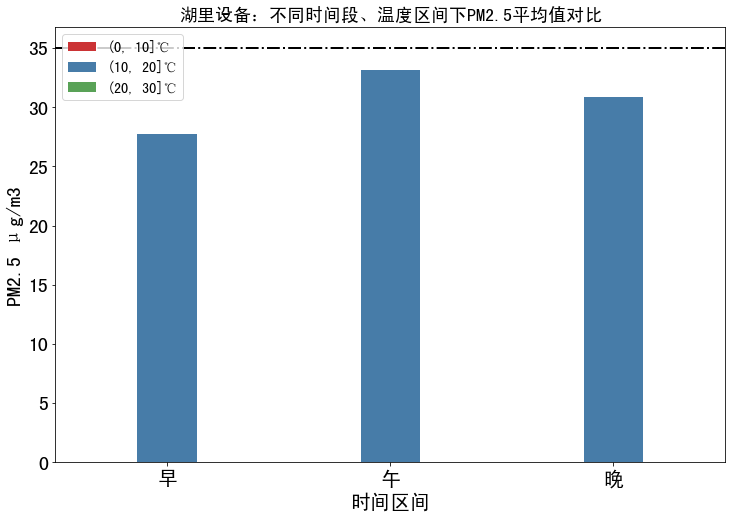

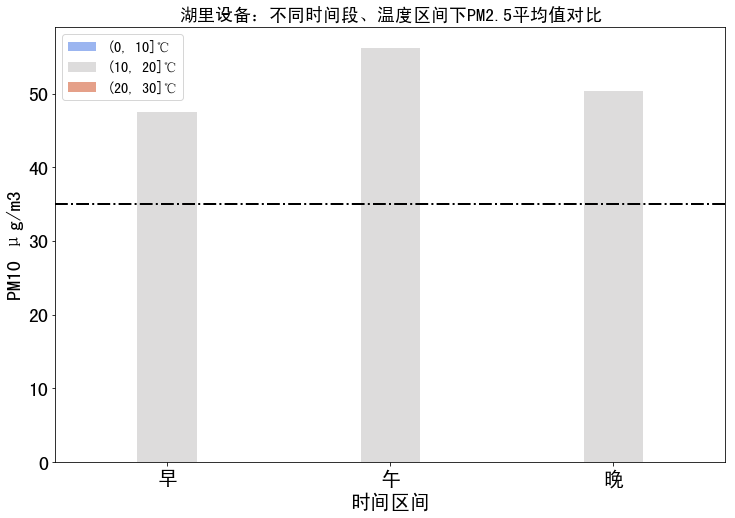

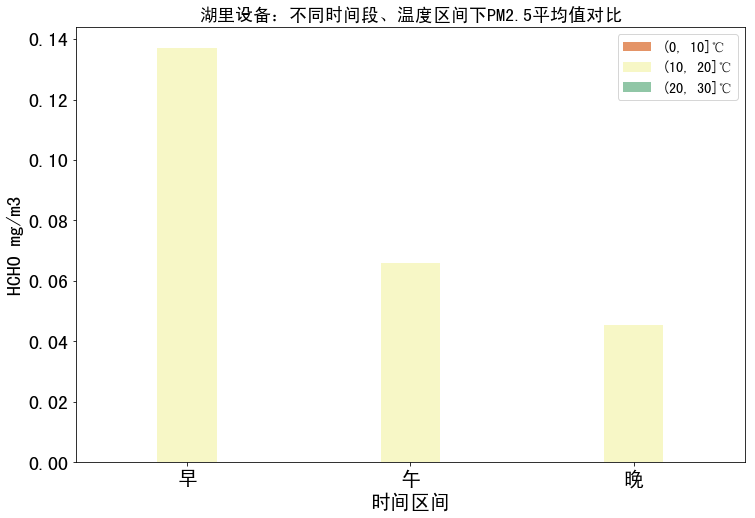

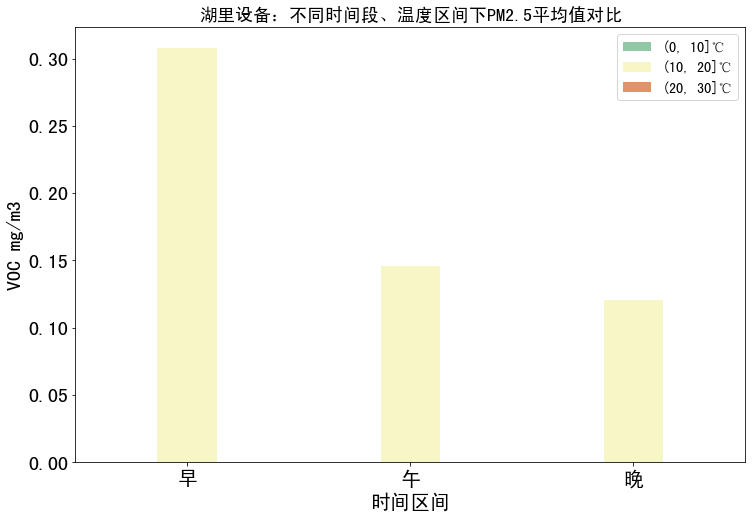

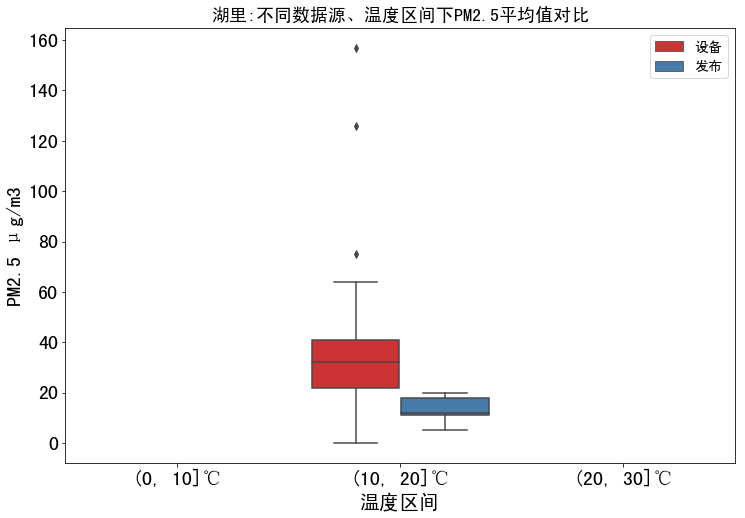

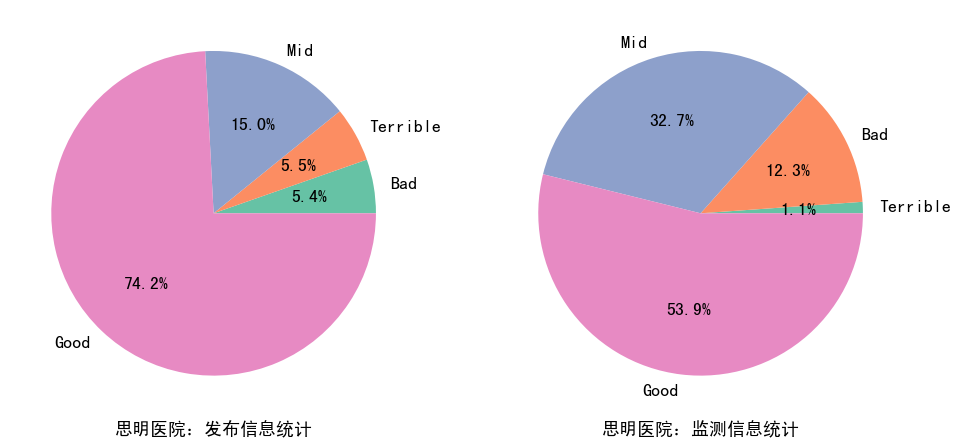

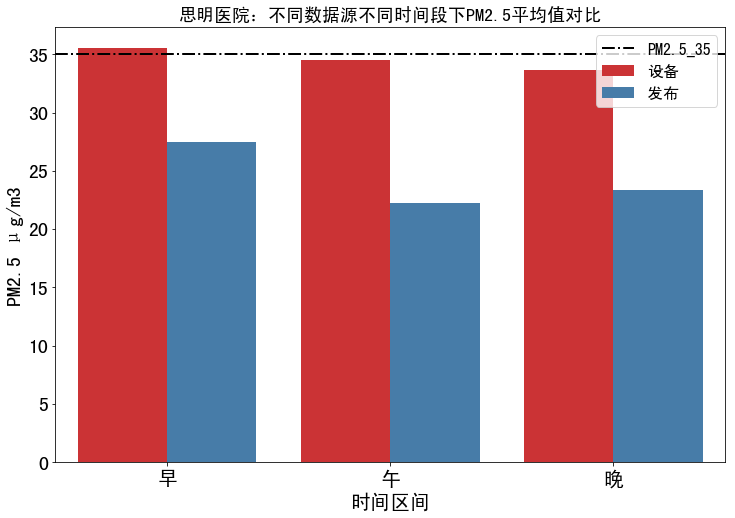

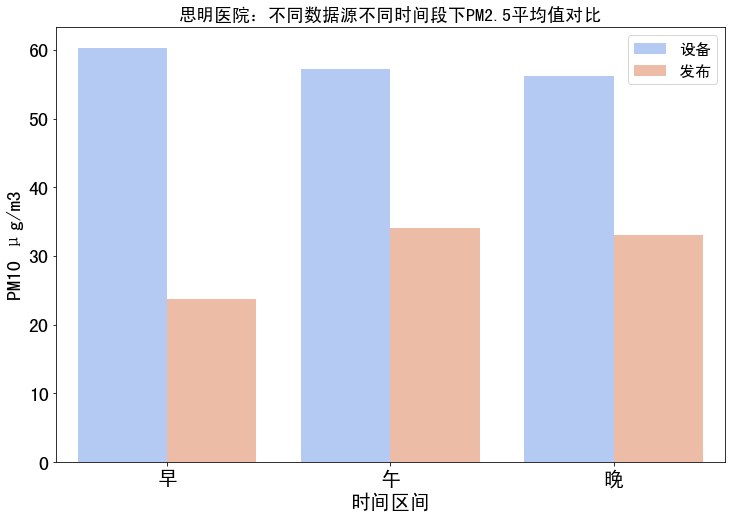

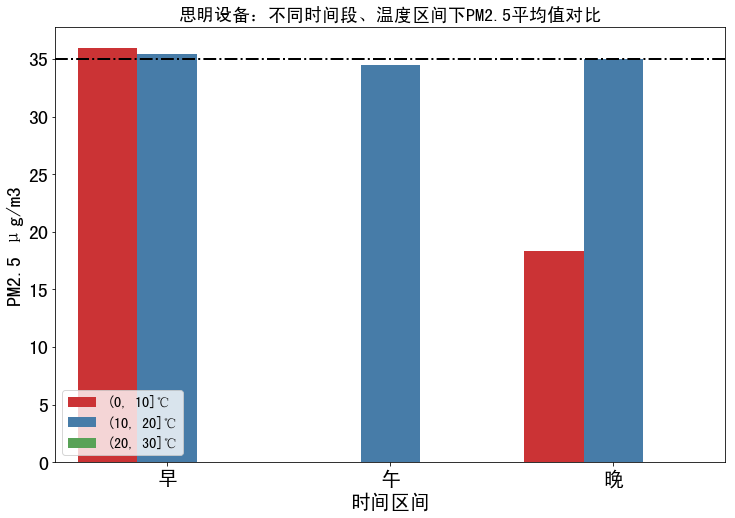

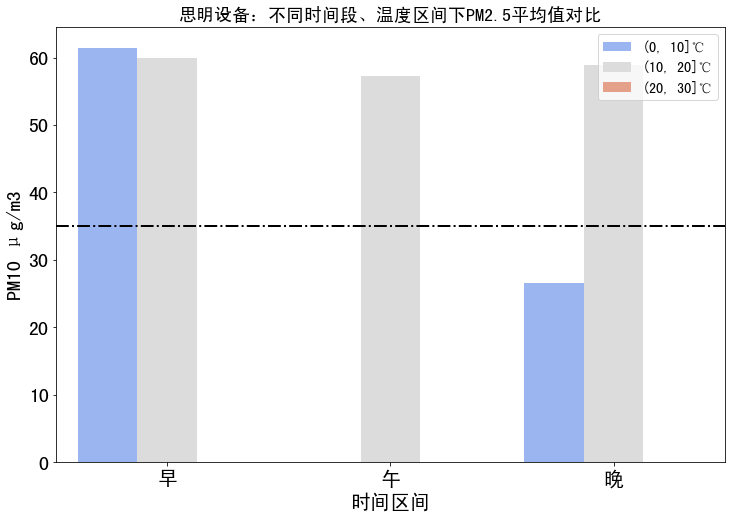

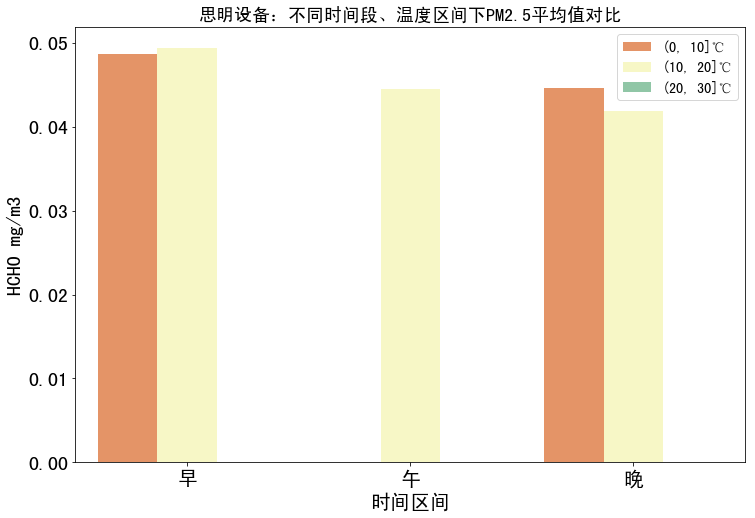

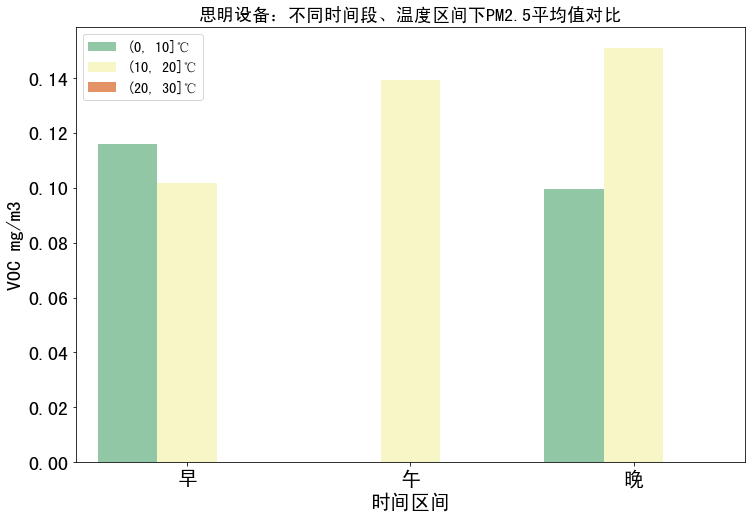

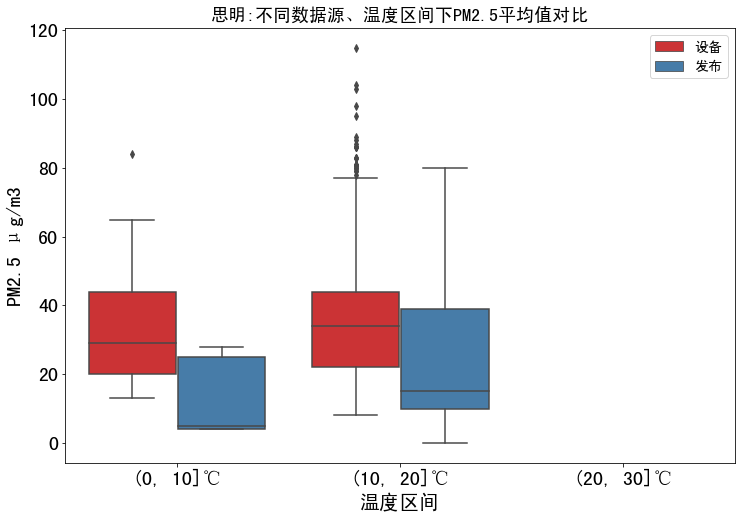

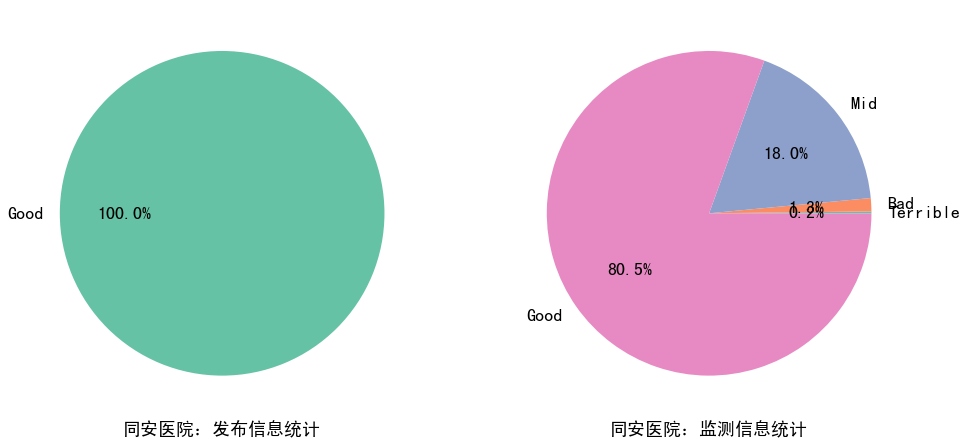

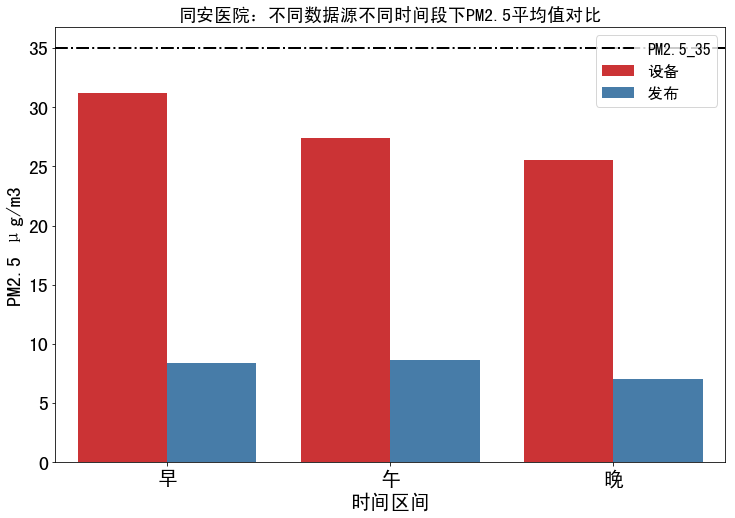

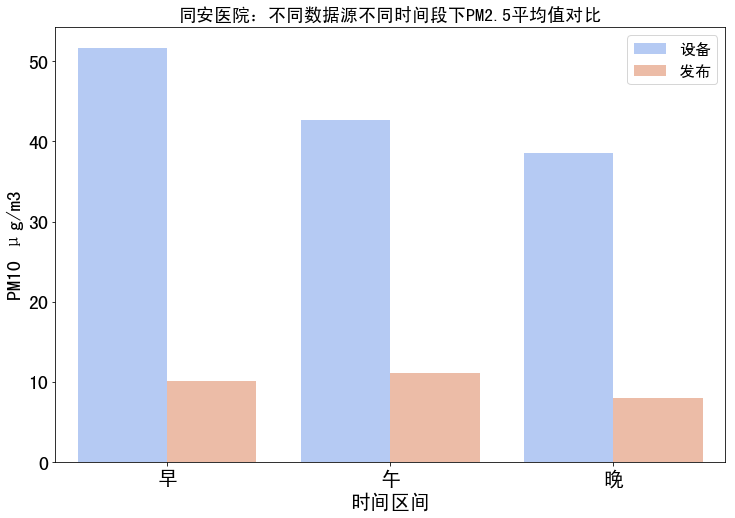

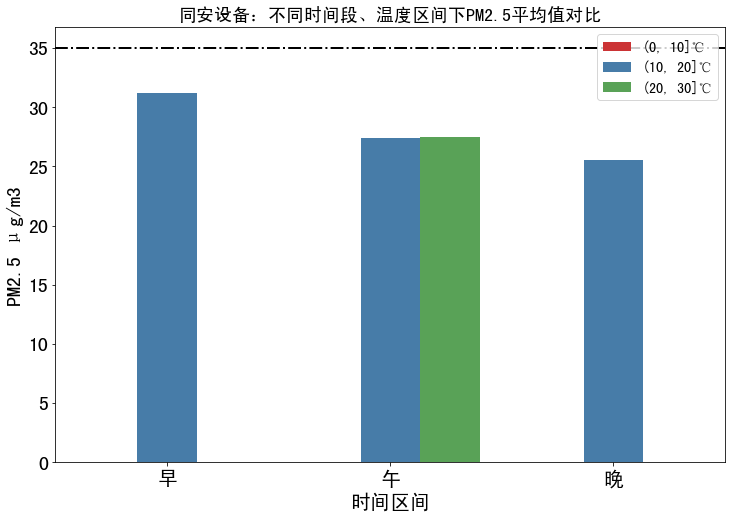

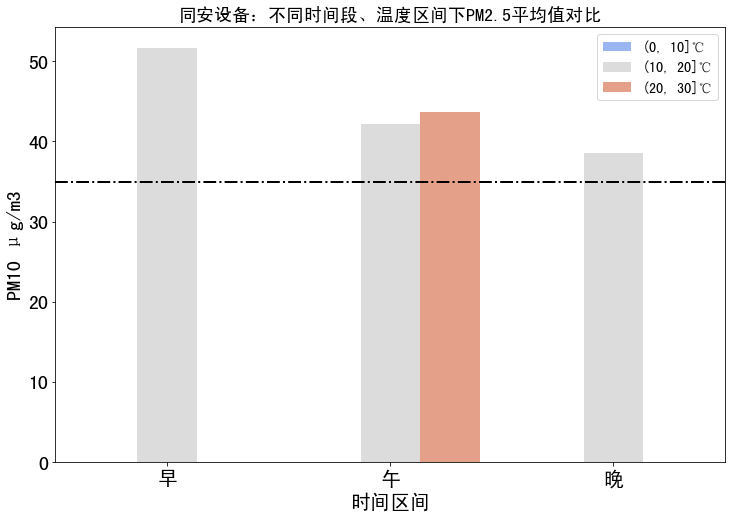

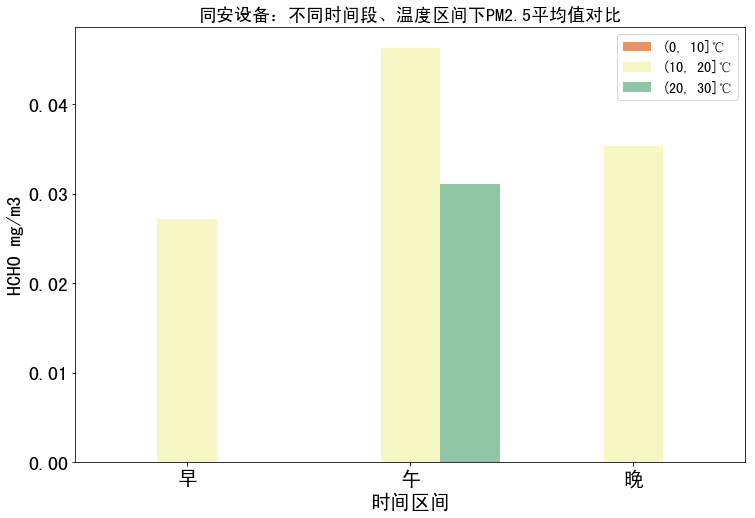

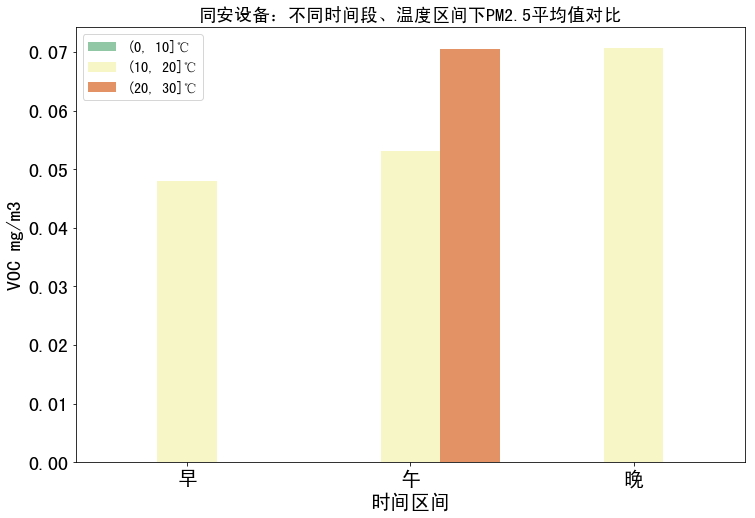

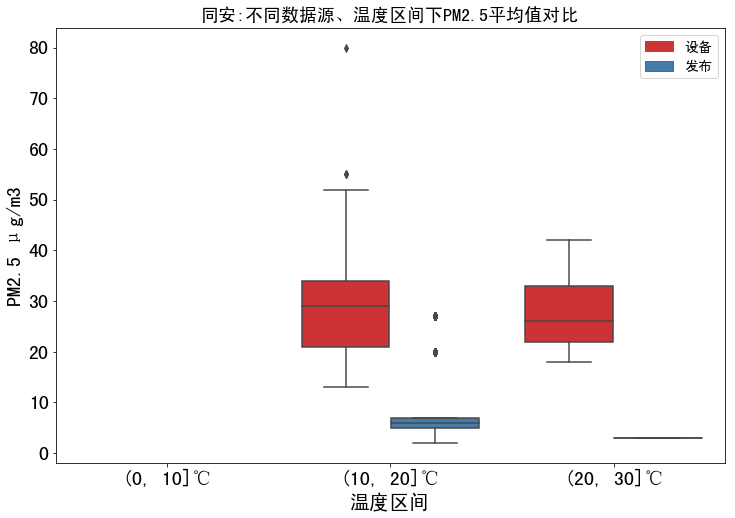

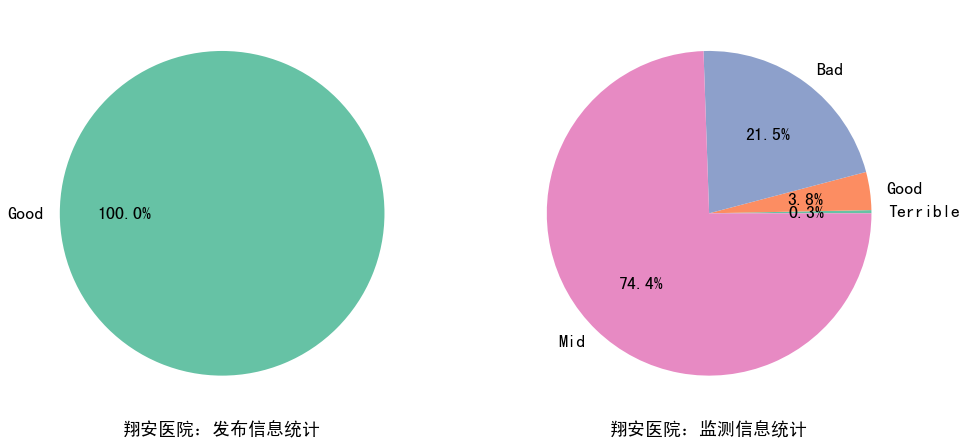

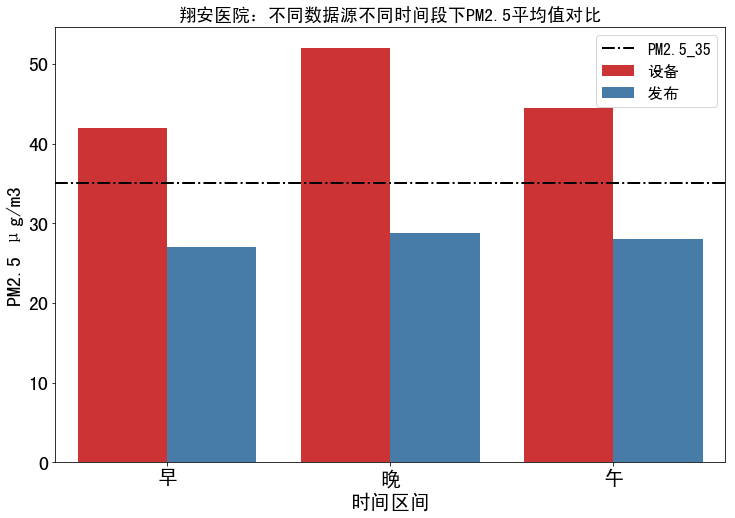

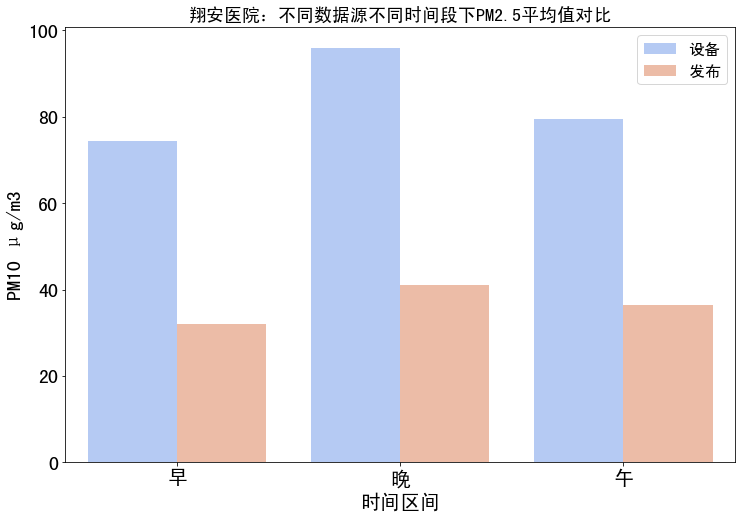

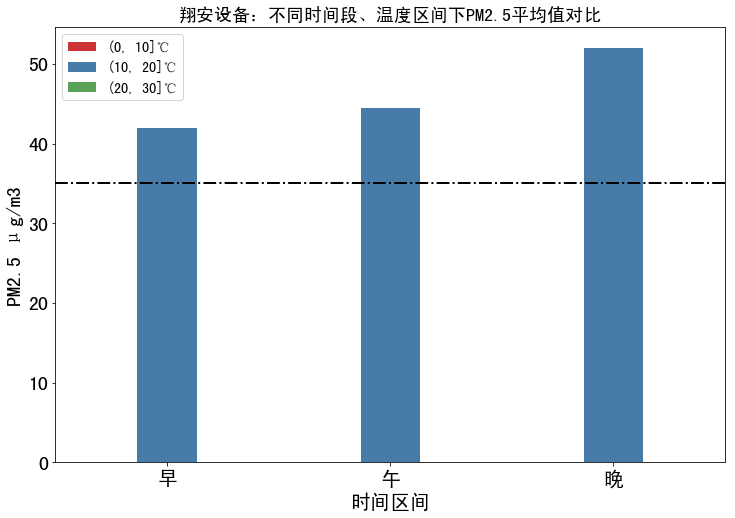

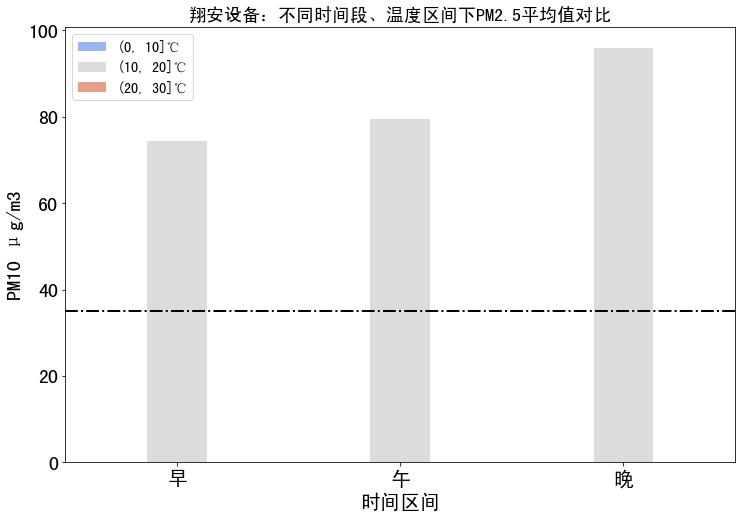

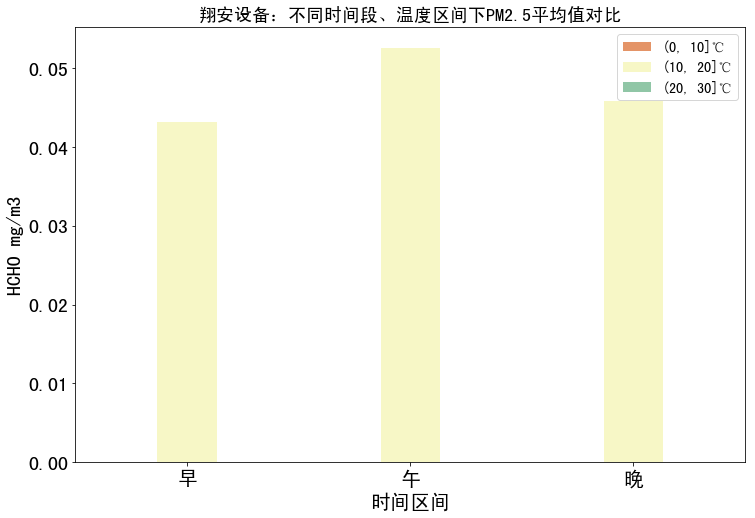

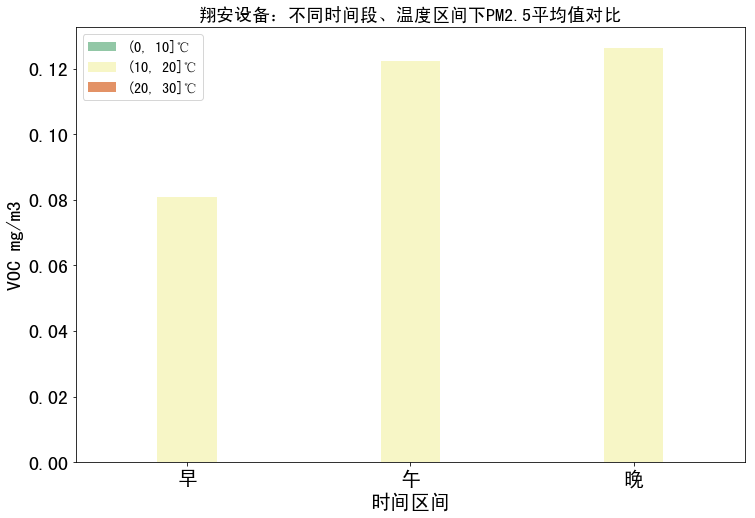

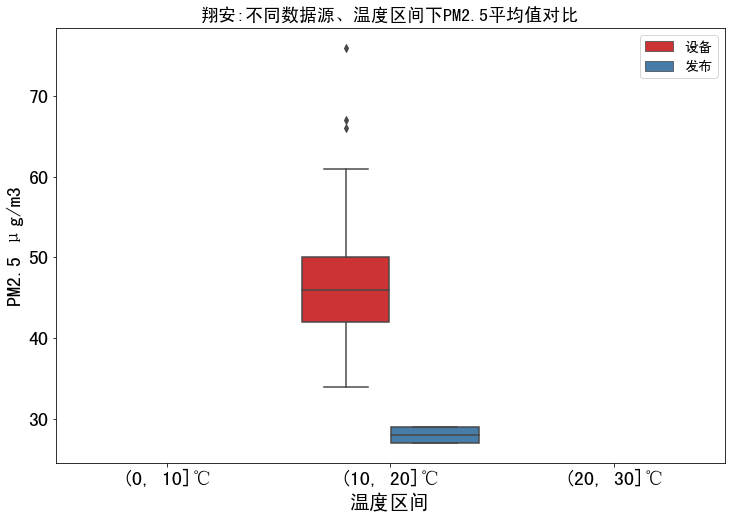

In [270]:
  
    
if __name__=='__main__':
    main()
    

In [35]:
!pwd

/Users/lin/Desktop/Air_detecting
